In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",500)

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
train=pd.read_csv(r"C:\Users\hp\Downloads\train (1).csv")
test=pd.read_csv(r"C:\Users\hp\Downloads\test (1).csv")
df=pd.concat([train,test],ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3]:
print('No. of Rows',df.shape[0])
print('No. of Variables',df.shape[1])
print()
print("Number Columns:",df.select_dtypes(np.number).columns.values)
print()
print("Categorical Columns:",df.select_dtypes('object').columns.values)

No. of Rows 2919
No. of Variables 81

Number Columns: ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']

Categorical Columns: ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'Ga

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [5]:
#MSSubClass, OverallQual, OverallCond should be categorical columns according data description

In [6]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')

In [7]:
df.describe(include='object').T

,count,unique,top,freq
MSSubClass,2919,16,20,1079
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443


In [8]:
nullval=df.isnull().sum().to_frame()
nullval['Percentage']=df.isnull().sum()*100/len(df)
nullval

,0,Percentage
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,4,0.137033
LotFrontage,486,16.649538
LotArea,0,0.000000
Street,0,0.000000
Alley,2721,93.216855
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,2,0.068517


In [9]:
df.Alley.value_counts() # max values are null = 93% , drop the column

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [10]:
df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [11]:
df.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
df.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [13]:
df.drop(columns=['Alley','MiscFeature','Fence','PoolQC'],inplace=True)

In [14]:
num_cols=df.select_dtypes(np.number).columns.values
cat_cols=df.select_dtypes('object').columns.values

In [15]:
len(num_cols)

35

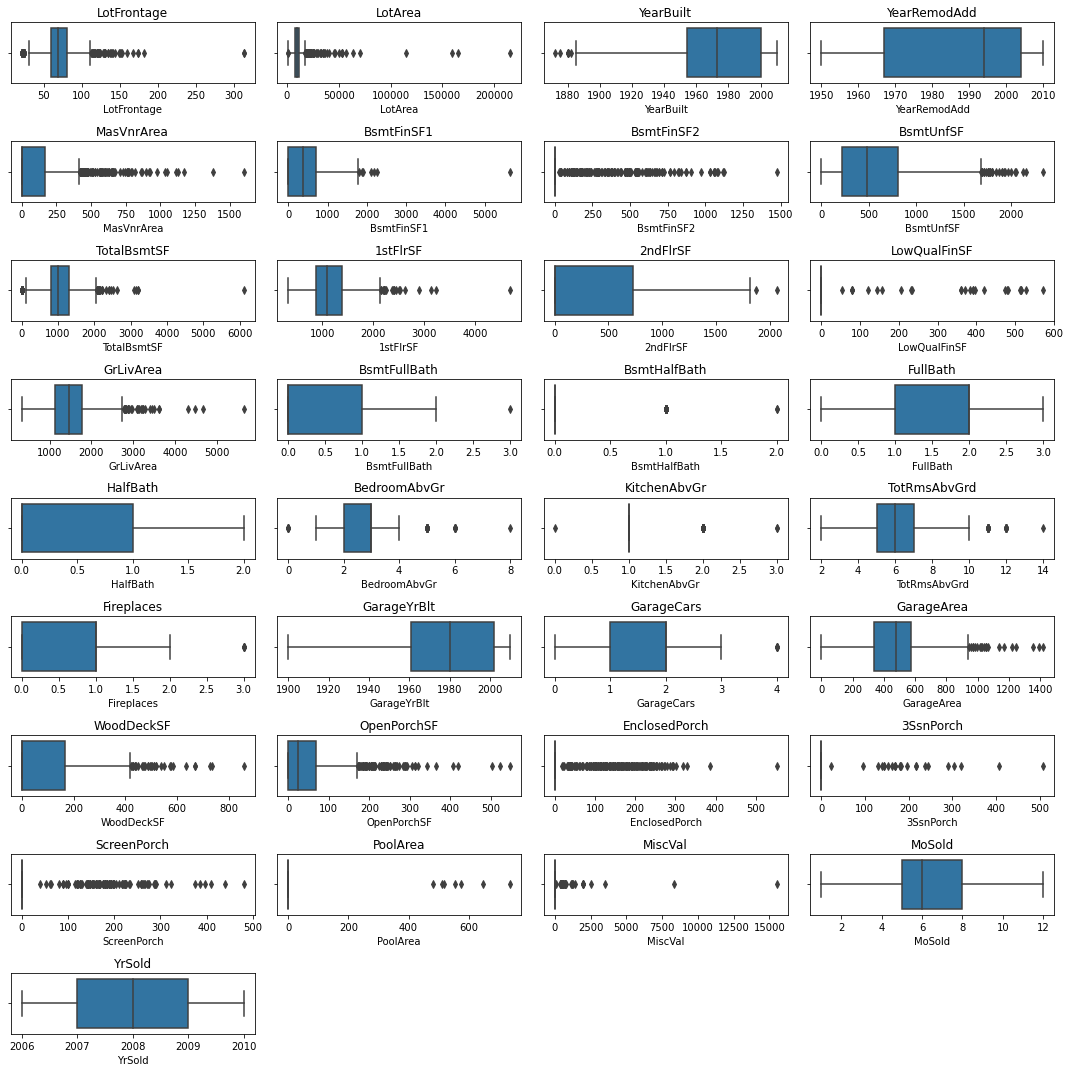

In [16]:
plt.figure(figsize=(15,15))
t=1
for col in num_cols[1:-1]:
    plt.subplot(9,4,t)
    sns.boxplot(x=col,data=train)
    t+=1
    plt.title(col)
plt.tight_layout()

In [17]:
df[df.Exterior1st.isnull()] #many columns are nan in this row we drop the row

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2151,2152,30,RL,85.0,19550,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,...,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,0,1,2008,WD,Normal,NaN


In [18]:
df.loc[df.MasVnrType.isnull()==True,['Id','MasVnrType','MasVnrArea']] 

,Id,MasVnrType,MasVnrArea
234,235,NaN,NaN
529,530,NaN,NaN
650,651,NaN,NaN
936,937,NaN,NaN
973,974,NaN,NaN
977,978,NaN,NaN
1243,1244,NaN,NaN
1278,1279,NaN,NaN
1691,1692,NaN,NaN
1706,1707,NaN,NaN


In [19]:
df.groupby(by='MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     195.480000
BrkFace    261.672355
None         0.707233
Stone      239.550201
Name: MasVnrArea, dtype: float64

In [20]:
df.loc[df.BsmtExposure.isnull()==True,['Id','BsmtCond','BsmtQual','BsmtFinType1']].shape

(82, 4)

In [21]:
pd.crosstab(df.SaleCondition,df.SaleType)

SaleType,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
SaleCondition,,,,,,,,,
Abnorml,46,1,0,3,2,0,0,5,133
AdjLand,0,0,0,0,0,0,0,0,12
Alloca,0,0,0,0,0,0,0,0,24
Family,2,1,0,1,2,1,0,1,38
Normal,39,10,4,21,5,7,0,1,2314
Partial,0,0,1,1,0,0,239,0,4


In [22]:
df['FireplaceQu']=np.where(df['Fireplaces']==0,'NA',df['FireplaceQu'])

In [23]:
df.groupby(by='BsmtExposure')['MasVnrArea'].mean()

BsmtExposure
Av    134.487923
Gd    216.509091
Mn     94.188285
No     82.675504
Name: MasVnrArea, dtype: float64

In [24]:
df.MSZoning.fillna(df['MSZoning'].mode()[0],inplace=True)
df.MasVnrType.fillna(df['MasVnrType'].mode()[0],inplace=True)
df.Utilities.fillna(df['Utilities'].mode()[0],inplace=True)
df.BsmtFullBath.fillna(df['BsmtFullBath'].mode()[0],inplace=True)
df.BsmtHalfBath.fillna(df['BsmtHalfBath'].mode()[0],inplace=True)
df.Electrical.fillna(df['Electrical'].mode()[0],inplace=True)
df.Functional.fillna(df['Functional'].mode()[0],inplace=True)
df.SaleType.fillna(df['SaleType'].mode()[0],inplace=True)
df.KitchenQual.fillna(df['KitchenQual'].mode()[0],inplace=True)
df.Exterior1st.fillna(df['Exterior1st'].mode()[0],inplace=True)
df.Exterior2nd.fillna(df['Exterior2nd'].mode()[0],inplace=True)

df.BsmtCond.fillna('NA',inplace=True)
df.BsmtQual.fillna('NA',inplace=True)
df.BsmtFinType1.fillna('NA',inplace=True)
df.BsmtFinType2.fillna('NA',inplace=True)
df.BsmtExposure.fillna('NA',inplace=True)
df.GarageType.fillna('NA',inplace=True)
df.GarageFinish.fillna('NA',inplace=True)
df.GarageQual.fillna('NA',inplace=True)
df.GarageCond.fillna('NA',inplace=True)

In [25]:
df.LotFrontage.fillna(df['LotFrontage'].mean(),inplace=True)
df.MasVnrArea.fillna(df['MasVnrArea'].mean(),inplace=True)

In [26]:
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)

In [27]:
df['BsmtFinSF1'].fillna(0.0,inplace=True)
df['BsmtFinSF2'].fillna(0.0,inplace=True)
df['BsmtUnfSF'].fillna(0.0,inplace=True)
df['TotalBsmtSF'].fillna(0.0,inplace=True)
df['GarageCars'].fillna(0.0,inplace=True)
df['GarageArea'].fillna(0.0,inplace=True)

In [28]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [29]:
df[df['Exterior1st'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [30]:
df['Exterior1st']

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
2914    CemntBd
2915    CemntBd
2916    VinylSd
2917    HdBoard
2918    HdBoard
Name: Exterior1st, Length: 2919, dtype: object

### Explore the Dependent Variable

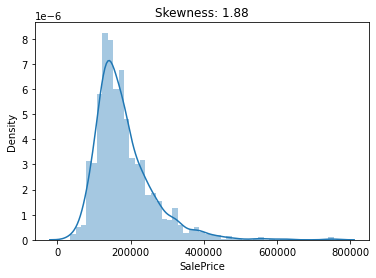

In [31]:
sns.distplot(df['SalePrice'])
plt.title('Skewness: %.2f'%(df['SalePrice'].skew()))
plt.show()

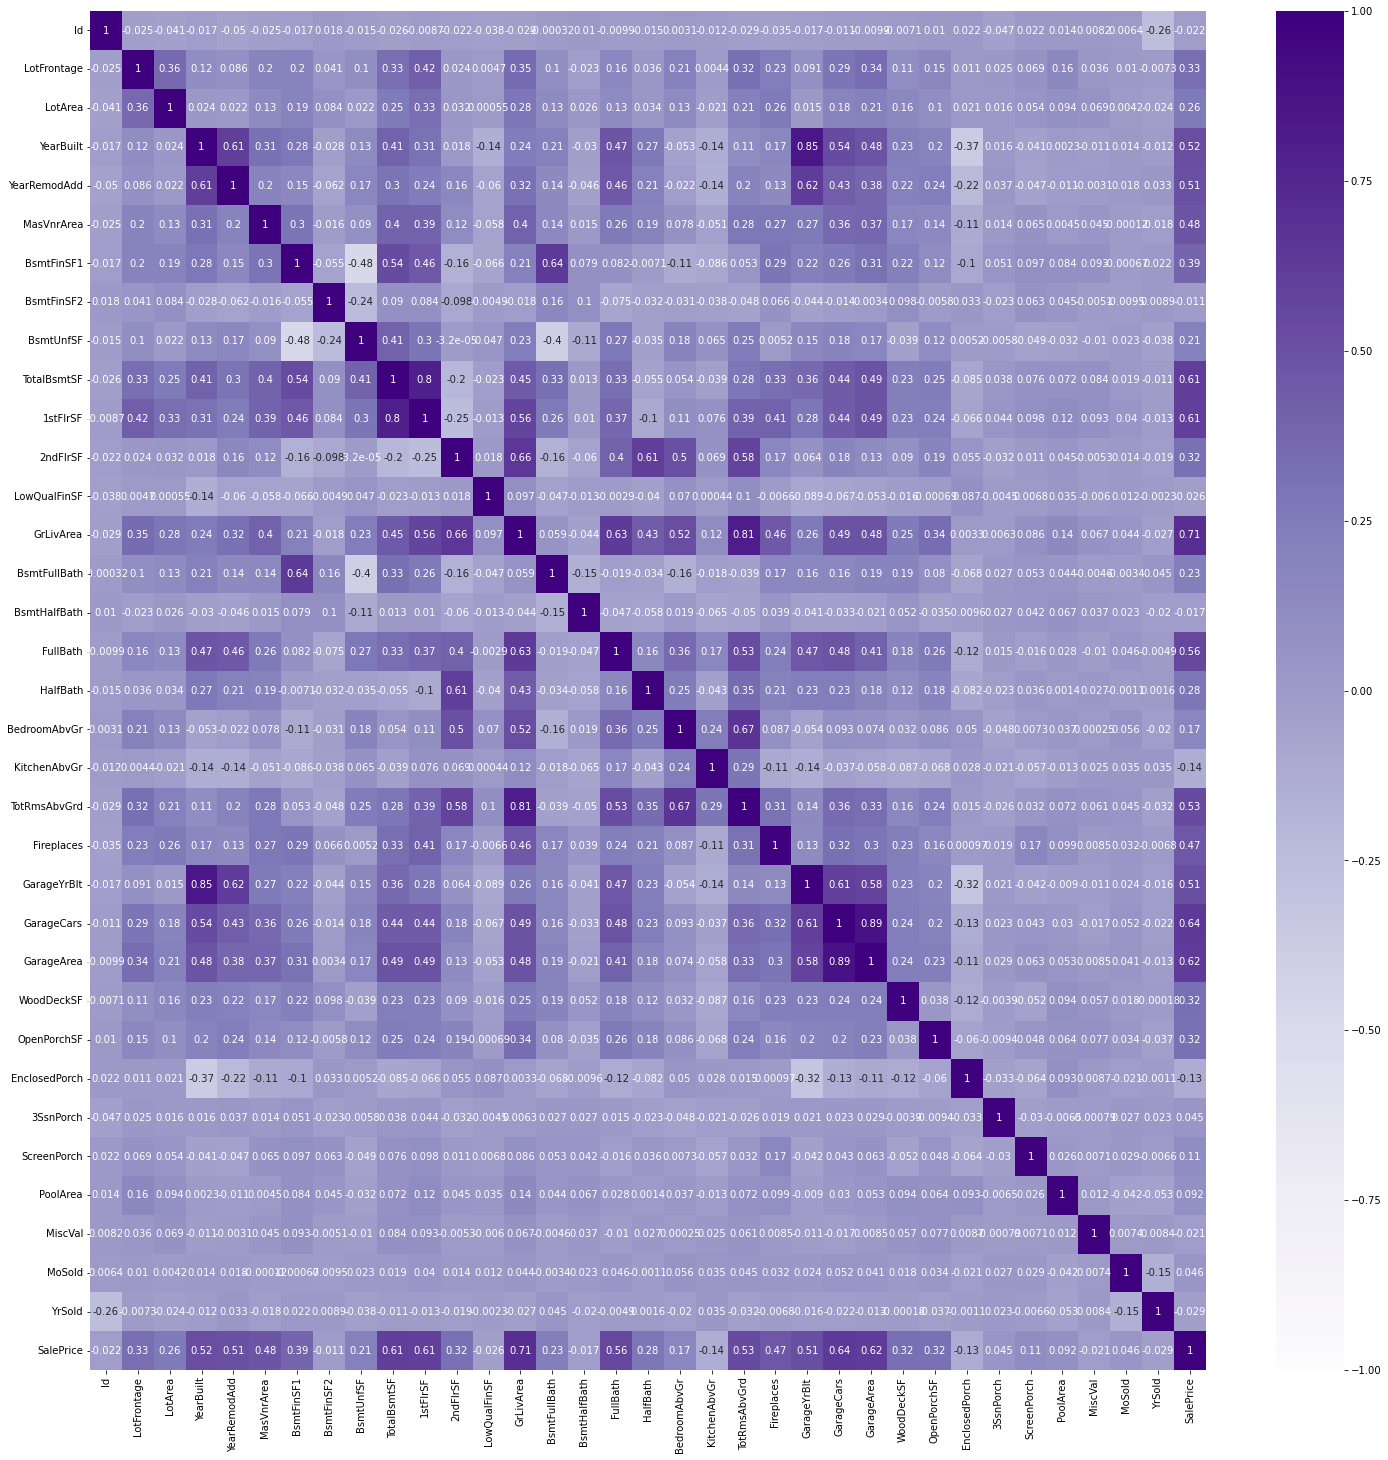

In [32]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=+1,cmap='Purples')
plt.show()

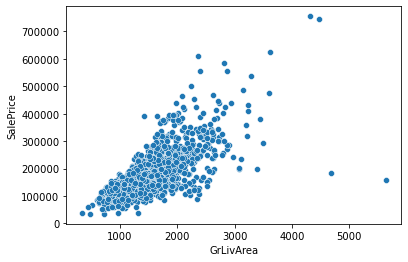

In [33]:
sns.scatterplot(df.GrLivArea,df.SalePrice)
plt.show()

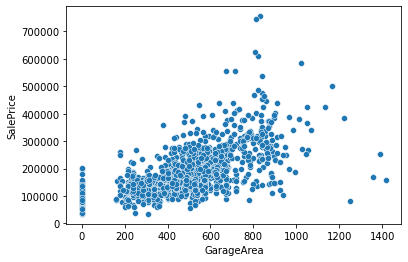

In [34]:
sns.scatterplot(df.GarageArea,df.SalePrice)
plt.show()

In [35]:
#The Points at 0 mean The property has no Garage there.

<AxesSubplot:xlabel='BldgType'>

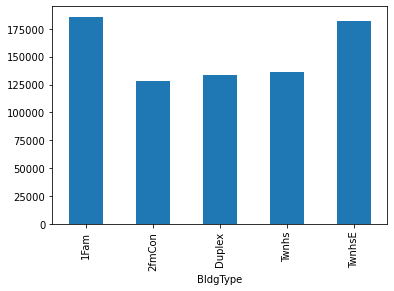

In [36]:
df.groupby(by=df['BldgType'])['SalePrice'].mean().plot(kind='bar')

<AxesSubplot:xlabel='MSZoning'>

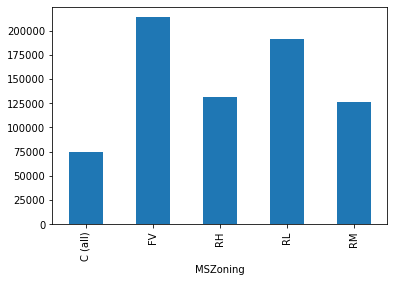

In [37]:
df.groupby(by=df['MSZoning'])['SalePrice'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Street'>

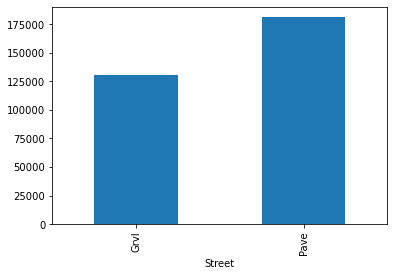

In [38]:
df.groupby(by=df['Street'])['SalePrice'].mean().plot(kind='bar')

<AxesSubplot:xlabel='LotShape'>

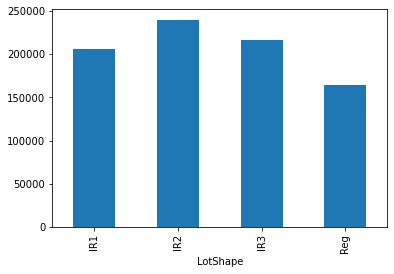

In [39]:
df.groupby(by=df['LotShape'])['SalePrice'].mean().plot(kind='bar')

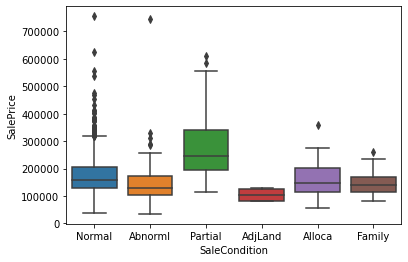

In [40]:
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)
plt.show()

In [41]:
df['PropertyAge']=df['YrSold']-df['YearBuilt']

<AxesSubplot:xlabel='PropertyAge', ylabel='SalePrice'>

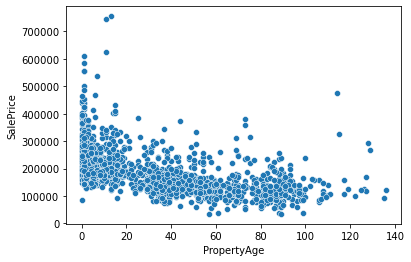

In [42]:
sns.scatterplot(x='PropertyAge',y='SalePrice',data=df)

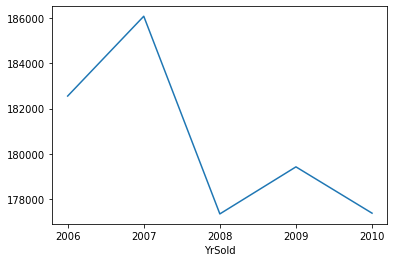

In [43]:
df.groupby(by=df['YrSold'])['SalePrice'].mean().plot(kind='line')
plt.xticks(np.arange(2006,2011))
plt.show()

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [45]:
cat_cols

array(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [46]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print("*******************************************************")

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64
*******************************************************
MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
*******************************************************
Street
Pave    2907
Grvl      12
Name: Street, dtype: int64
*******************************************************
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
*******************************************************
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
*******************************************************
Utilities
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
*******************************************************
LotC

In [47]:
def zone(x):
    if x=='C (all)':
        return 'C (all)'
    elif x=='FV':
        return 'FV'
    elif x=='I':
        return 'I'
    else:
        return 'R'

In [48]:
df['MSZoning']=df['MSZoning'].apply(zone)

In [49]:
df['Utilities'].value_counts() #max have allpub so drop the column it has no imformation to convey to the model

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [50]:
df['MSZoning'].value_counts()

R          2755
FV          139
C (all)      25
Name: MSZoning, dtype: int64

In [51]:
def Lot(x):
    if x=='Reg':
        return 'Reg'
    else:
        return 'Ir'

In [52]:
df['LotShape']=df['LotShape'].apply(Lot)

In [53]:
df.drop(columns=['Utilities','Street'],inplace=True)

In [54]:
num_transformer=Pipeline(steps=[('scaler',StandardScaler())])
cat_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))])

In [55]:
cat_cols=df.select_dtypes(include=['object','category']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns

In [57]:
num_cols=num_cols.drop('SalePrice')

In [58]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice']) #normalize dependent variable 
X_preprocessed = pipeline.fit_transform(X)

In [59]:
df[1460:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
1460,1461,20,R,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,5,Typ,0,NA,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,NaN,49
1461,1462,20,R,81.0,14267,Ir,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,...,6,Typ,0,NA,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,NaN,52
1462,1463,60,R,74.0,13830,Ir,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,NaN,13
1463,1464,60,R,78.0,9978,Ir,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,...,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,NaN,12
1464,1465,120,R,43.0,5005,Ir,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,...,5,Typ,0,NA,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,R,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,...,5,Typ,0,NA,NA,1970.0,NA,0.0,0.0,NA,NA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN,36
2915,2916,160,R,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,...,6,Typ,0,NA,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN,36
2916,2917,20,R,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN,46
2917,2918,85,R,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,...,6,Typ,0,NA,NA,1992.0,NA,0.0,0.0,NA,NA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN,14


In [60]:
y.iloc[:1460]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train = pd.DataFrame(X_preprocessed).iloc[:1460]
y_train = y.iloc[:1460]
X_test = pd.DataFrame(X_preprocessed).iloc[1460:]
y_test = y.iloc[1460:]

In [62]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}
# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 473940977.50063217

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15009107754203566

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13849033496540705



In [63]:
xgmodel=XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=500,random_state=42)
xgmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [64]:
pred=xgmodel.predict(X_test)

In [65]:
pred=pd.Series(np.exp(pred))

In [66]:
pred

0       125512.187500
1       157149.281250
2       196549.046875
3       203011.875000
4       182483.343750
            ...      
1454     77647.703125
1455     82309.687500
1456    122340.023438
1457    112783.617188
1458    209472.750000
Length: 1459, dtype: float32

In [67]:
housesubmission1=pd.DataFrame({'Id':test['Id'],'SalePrice':pred.values})

In [68]:
housesubmission1=housesubmission1.reset_index(drop=True)

In [69]:
housesubmission1.to_csv("housesubmission1.csv",index=False)

### PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

In [72]:
X_train_pca = pd.DataFrame(X_pca).iloc[:1460]
y_train_pca = y.iloc[:1460]
X_test_pca = pd.DataFrame(X_pca).iloc[1460:]
y_test_pca = y.iloc[1460:]

In [73]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}
# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16825298278092468

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best RMSE for RandomForest: 0.15740896662385992

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.14798395336177078



In [ ]:
best_params

In [74]:
xgmodel2=XGBRegressor(learning_rate=0.1,max_depth=3,n_estimators=500,random_state=42)
xgmodel2.fit(X_train_pca,y_train_pca)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [76]:
pred=xgmodel2.predict(X_test_pca)

In [77]:
pred=pd.Series(np.exp(pred))

In [78]:
housesubmission2=pd.DataFrame({'Id':test['Id'],'SalePrice':pred.values})

In [79]:
housesubmission2=housesubmission2.reset_index(drop=True)

In [80]:
housesubmission2.to_csv("housesubmission2.csv",index=False)